In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering, KMeans, Birch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.model_selection import train_test_split

sns.set()

Загрузка данные сета.

In [2]:
credits = pd.read_csv('SouthGermanCredit.asc', sep=" ")
#Смотрим основные параметры.

Оцениваем что в дата-сете есть, и с чем прийдется иметь дело.

In [3]:
credits.head(100)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4,27,4,2,4526,4,2,4,3,1,...,1,32,2,2,2,2,1,2,2,1
96,2,12,4,3,3573,1,3,1,2,1,...,1,23,3,2,1,2,2,1,2,1
97,2,36,3,9,4455,1,3,2,1,1,...,1,30,2,2,2,4,2,2,2,0
98,1,9,2,2,2136,1,3,3,3,1,...,1,25,3,2,1,3,2,1,2,1


Cмотрим насколько однородны данные и сколько пропущенных элементов в тех или иных столбцах.

In [4]:
credits.count()

laufkont    1000
laufzeit    1000
moral       1000
verw        1000
hoehe       1000
sparkont    1000
beszeit     1000
rate        1000
famges      1000
buerge      1000
wohnzeit    1000
verm        1000
alter       1000
weitkred    1000
wohn        1000
bishkred    1000
beruf       1000
pers        1000
telef       1000
gastarb     1000
kredit      1000
dtype: int64

В процентном соотношении.

In [5]:
for col in credits.columns:
    pct_missing = np.mean(credits[col].isnull())
    print(f'{col} - {round(pct_missing * 100, 5)}     min: {credits[col].min()}     max:{credits[col].max()}')

laufkont - 0.0     min: 1     max:4
laufzeit - 0.0     min: 4     max:72
moral - 0.0     min: 0     max:4
verw - 0.0     min: 0     max:10
hoehe - 0.0     min: 250     max:18424
sparkont - 0.0     min: 1     max:5
beszeit - 0.0     min: 1     max:5
rate - 0.0     min: 1     max:4
famges - 0.0     min: 1     max:4
buerge - 0.0     min: 1     max:3
wohnzeit - 0.0     min: 1     max:4
verm - 0.0     min: 1     max:4
alter - 0.0     min: 19     max:75
weitkred - 0.0     min: 1     max:3
wohn - 0.0     min: 1     max:3
bishkred - 0.0     min: 1     max:4
beruf - 0.0     min: 1     max:4
pers - 0.0     min: 1     max:2
telef - 0.0     min: 1     max:2
gastarb - 0.0     min: 1     max:2
kredit - 0.0     min: 0     max:1


In [6]:
credits.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


Создаём карту корреляций.

<AxesSubplot:>

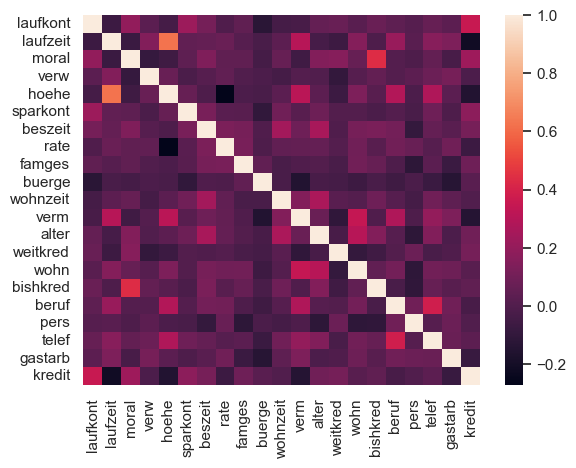

In [7]:
corr = credits.corr()
sns.heatmap(corr)

Убираем таргет из датасета

In [8]:
columns = credits.columns
credits = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(credits))
credits.columns = columns

In [9]:
target = credits["kredit"]
credits.drop(columns=["kredit"])

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,0.000000,0.205882,1.0,0.2,0.043964,0.00,0.25,1.000000,0.333333,0.0,1.000000,0.333333,0.035714,1.0,0.0,0.000000,0.666667,1.0,0.0,1.0
1,0.000000,0.073529,1.0,0.0,0.140255,0.00,0.50,0.333333,0.666667,0.0,0.333333,0.000000,0.303571,1.0,0.0,0.333333,0.666667,0.0,0.0,1.0
2,0.333333,0.117647,0.5,0.9,0.032519,0.25,0.75,0.333333,0.333333,0.0,1.000000,0.000000,0.071429,1.0,0.0,0.000000,0.333333,1.0,0.0,1.0
3,0.000000,0.117647,1.0,0.0,0.103004,0.00,0.50,0.666667,0.666667,0.0,0.333333,0.000000,0.357143,1.0,0.0,0.333333,0.333333,0.0,0.0,0.0
4,0.000000,0.117647,1.0,0.0,0.105700,0.00,0.50,1.000000,0.666667,0.0,1.000000,0.333333,0.339286,0.0,0.5,0.333333,0.333333,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.294118,0.5,0.3,0.095576,0.00,0.50,0.333333,0.666667,0.0,1.000000,0.000000,0.035714,1.0,0.0,0.000000,0.333333,0.0,0.0,1.0
996,0.000000,0.294118,0.5,0.0,0.112964,0.00,1.00,1.000000,0.666667,0.5,0.000000,0.000000,0.464286,1.0,0.5,0.000000,0.666667,1.0,0.0,1.0
997,1.000000,0.250000,1.0,0.0,0.683944,1.00,1.00,1.000000,0.666667,0.0,1.000000,1.000000,0.196429,1.0,1.0,0.000000,1.000000,1.0,1.0,1.0
998,0.333333,0.117647,0.5,0.3,0.342137,1.00,0.00,0.333333,0.666667,0.0,0.000000,1.000000,0.589286,1.0,0.5,0.000000,1.000000,1.0,1.0,1.0


Делим датасет на тренировочную и тестовую часть

In [10]:
datasets = {"train": {}, "test": {}}
datasets["train"]["data"], datasets["test"]["data"], datasets["train"]["target"], datasets["test"][
    "target"] = train_test_split(credits, target, train_size=0.9, shuffle=True)
print(datasets["train"]["data"].shape)

(900, 21)


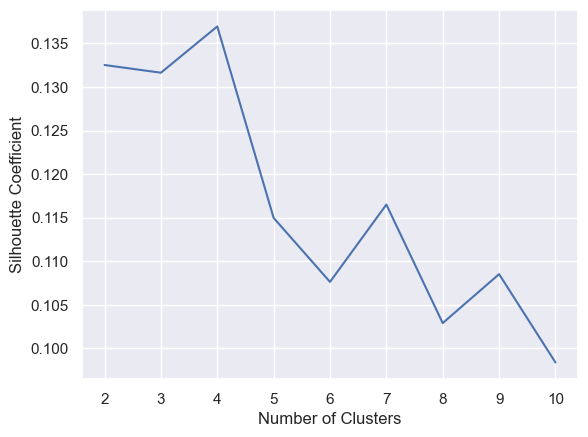

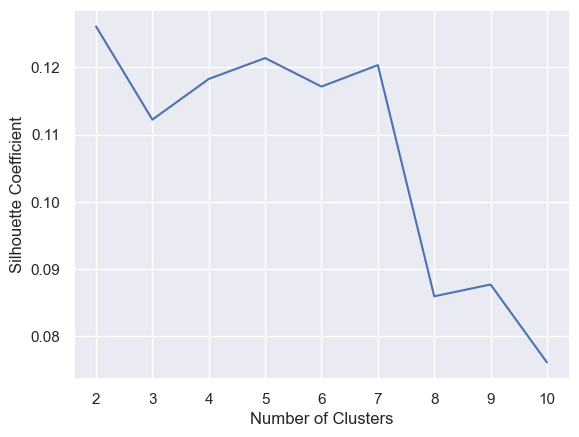

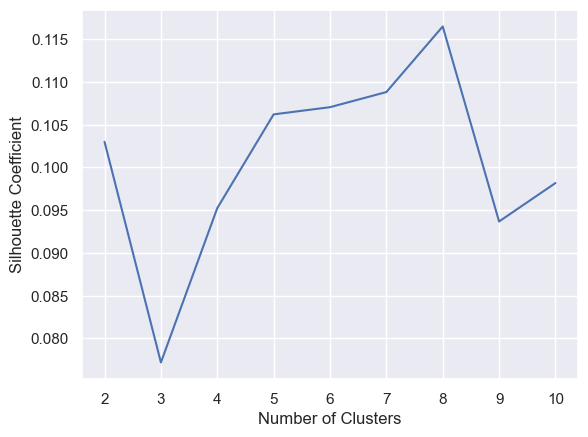

In [11]:
#create list to hold Silhouette Coefficient values for each k
silhouette_scores = []
for k in range(2, 11):
    cluster_kmeans = KMeans(n_clusters=k)
    cluster_kmeans.fit(datasets["train"]["data"])
    silhouette_scores.append(silhouette_score(datasets["train"]["data"], cluster_kmeans.labels_))

#visualize results
plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

silhouette_scores.clear()
for k in range(2, 11):
    cluster_agglomerative = AgglomerativeClustering(n_clusters=k)
    cluster_agglomerative.fit(datasets["train"]["data"])
    silhouette_scores.append(silhouette_score(datasets["train"]["data"], cluster_agglomerative.labels_))

#visualize results
plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

silhouette_scores.clear()
for k in range(2, 11):
    cluster_birch = Birch(n_clusters=k)
    cluster_birch.fit(datasets["train"]["data"])
    silhouette_scores.append(silhouette_score(datasets["train"]["data"], cluster_birch.labels_))

#visualize results
plt.plot(range(2, 11), silhouette_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

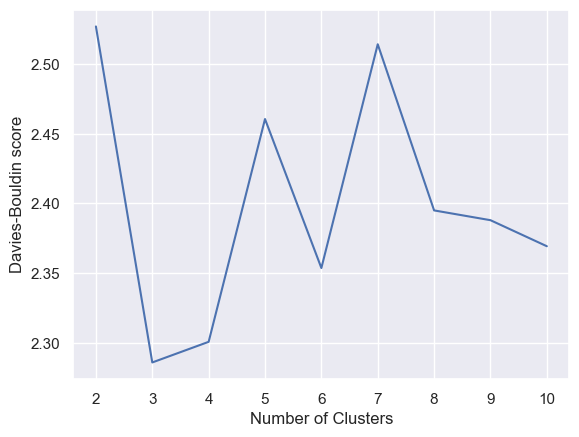

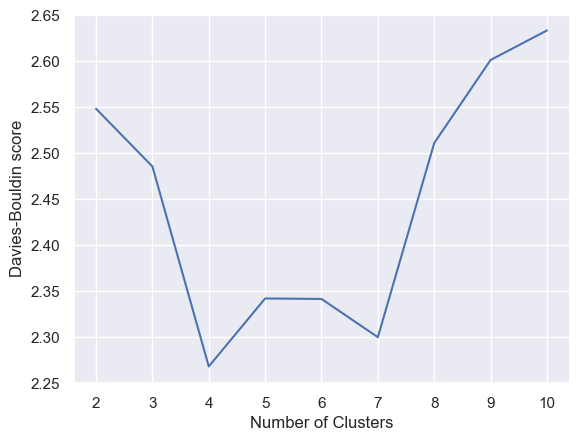

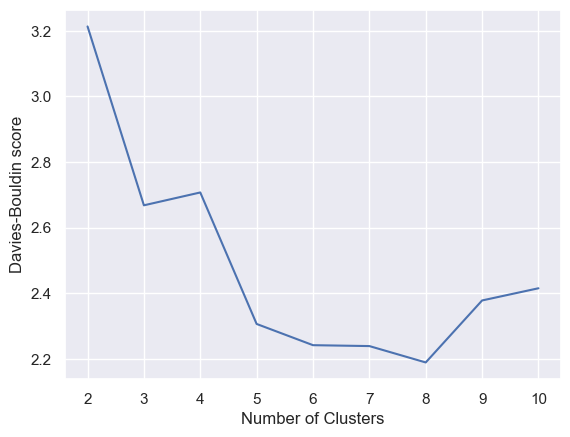

In [12]:
#create list to hold Davies-Bouldin score values for each k
davies_bouldin_scores = []
for k in range(2, 11):
    cluster_kmeans = KMeans(n_clusters=k)
    cluster_kmeans.fit(datasets["train"]["data"])
    davies_bouldin_scores.append(davies_bouldin_score(datasets["train"]["data"], cluster_kmeans.labels_))

#visualize results
plt.plot(range(2, 11), davies_bouldin_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin score")
plt.show()

davies_bouldin_scores.clear()
for k in range(2, 11):
    cluster_agglomerative = AgglomerativeClustering(n_clusters=k)
    cluster_agglomerative.fit(datasets["train"]["data"])
    davies_bouldin_scores.append(davies_bouldin_score(datasets["train"]["data"], cluster_agglomerative.labels_))

#visualize results
plt.plot(range(2, 11), davies_bouldin_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin score")
plt.show()

davies_bouldin_scores.clear()
for k in range(2, 11):
    cluster_birch = Birch(n_clusters=k)
    cluster_birch.fit(datasets["train"]["data"])
    davies_bouldin_scores.append(davies_bouldin_score(datasets["train"]["data"], cluster_birch.labels_))

#visualize results
plt.plot(range(2, 11), davies_bouldin_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin score")
plt.show()

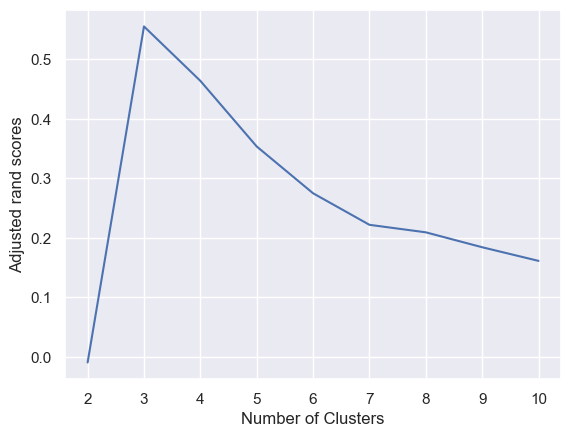

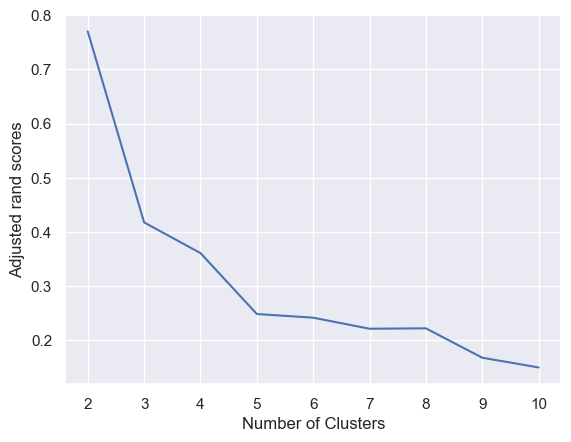

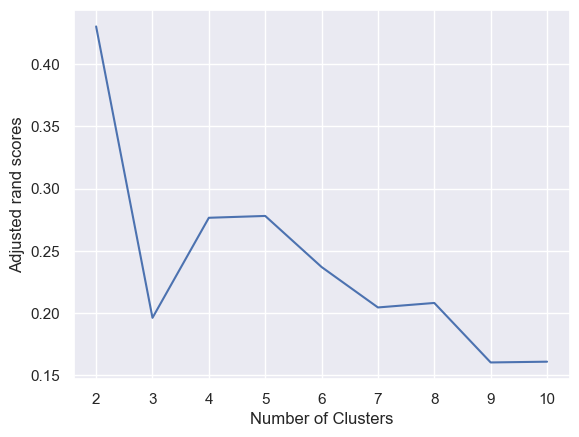

In [13]:
adjusted_rand_scores = []
for k in range(2, 11):
    cluster_kmeans = KMeans(n_clusters=k)
    cluster_kmeans.fit(datasets["train"]["data"])
    cluster_kmeans_predict = cluster_kmeans.predict(datasets["test"]["data"])
    adjusted_rand_scores.append(adjusted_rand_score(cluster_kmeans_predict, datasets["test"]["target"]))

#visualize results
plt.plot(range(2, 11), adjusted_rand_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted rand scores")
plt.show()

adjusted_rand_scores.clear()
for k in range(2, 11):
    cluster_agglomerative = AgglomerativeClustering(n_clusters=k)
    cluster_agglomerative.fit(datasets["train"]["data"])
    cluster_agglomerative_predict = cluster_agglomerative.fit_predict(datasets["test"]["data"])
    adjusted_rand_scores.append(adjusted_rand_score(cluster_agglomerative_predict, datasets["test"]["target"]))

#visualize results
plt.plot(range(2, 11), adjusted_rand_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted rand scores")
plt.show()

adjusted_rand_scores = []
for k in range(2, 11):
    cluster_birch = Birch(n_clusters=k)
    cluster_birch.fit(datasets["train"]["data"])
    cluster_birch_predict = cluster_birch.predict(datasets["test"]["data"])
    adjusted_rand_scores.append(adjusted_rand_score(cluster_birch_predict, datasets["test"]["target"]))

#visualize results
plt.plot(range(2, 11), adjusted_rand_scores)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Adjusted rand scores")
plt.show()

Из графиков метрик видно что оптимальным количеством кластеров является 4. Для моделей Agglomerative Clustering и KMeans метрики при значении кластеров 4 оптимально, для Birch приемлемы.

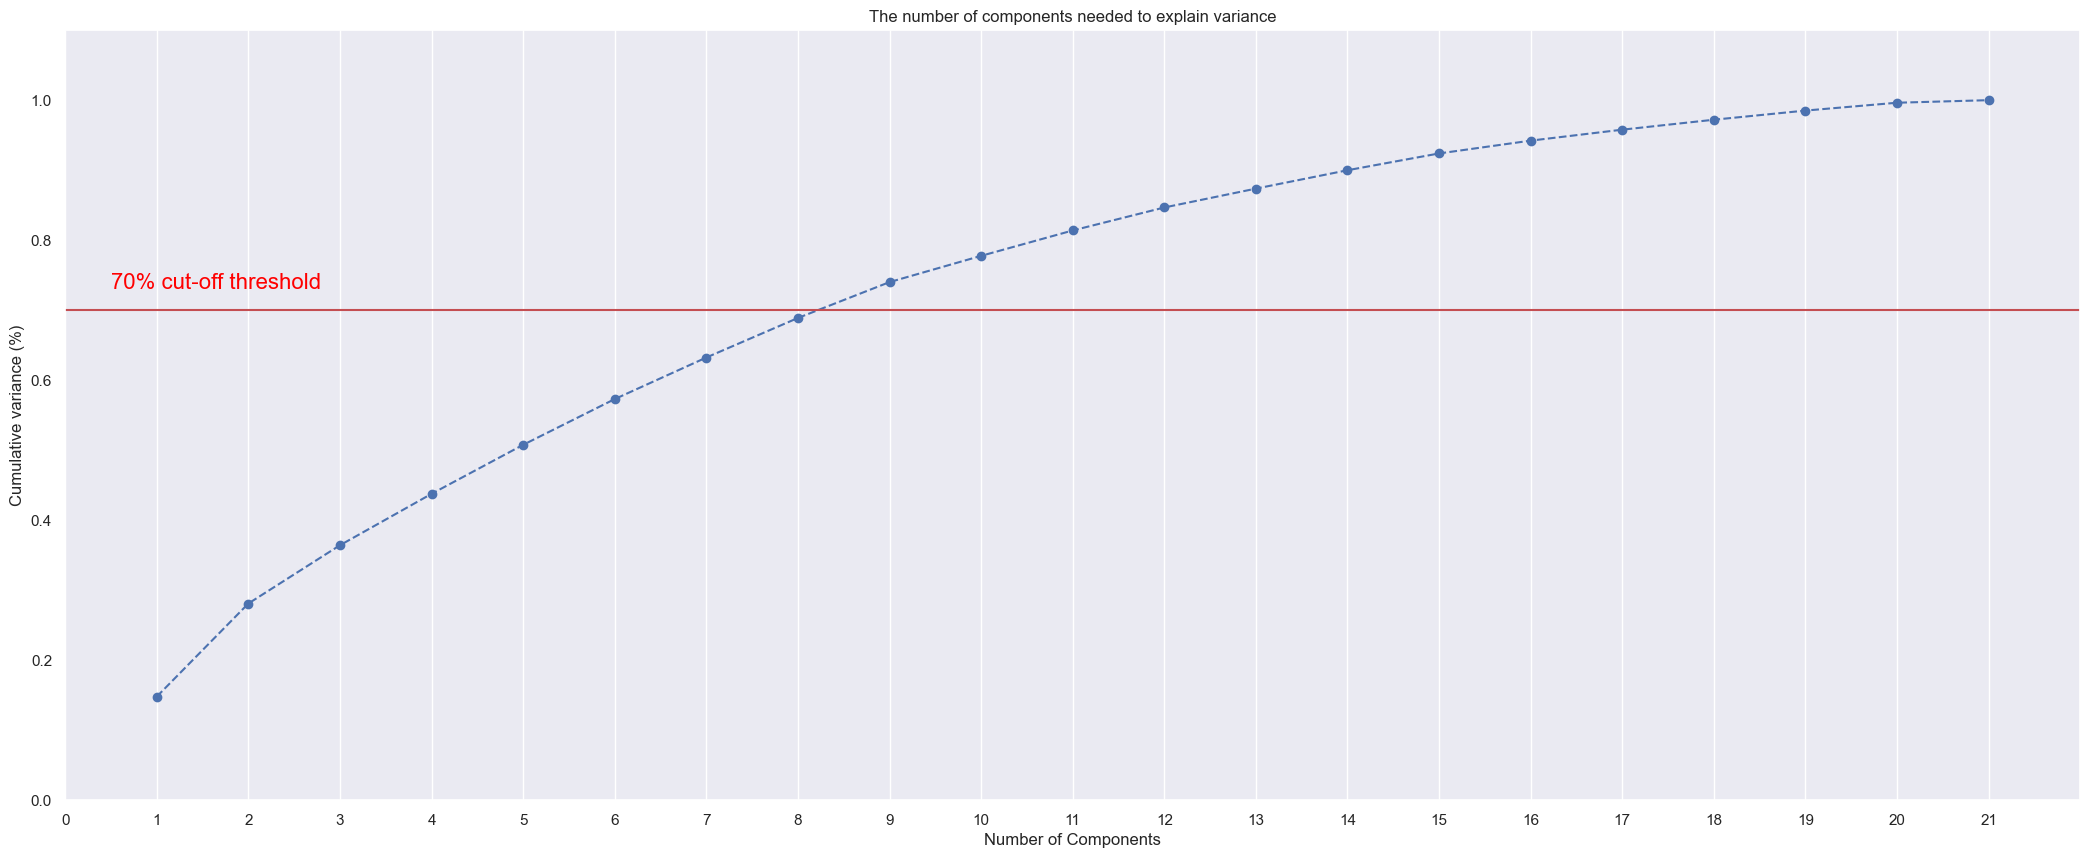

In [14]:
pca = PCA().fit(credits)

plt.rcParams["figure.figsize"] = (26, 10)
fig, ax = plt.subplots()
xi = np.arange(1, 22, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0, 1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 22, step=1))  #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.70, color='r', linestyle='-')
plt.text(0.5, 0.73, '70% cut-off threshold', color='red', fontsize=16)

ax.grid(axis='y')
plt.show()

Мы утратим приблизительно 30% информации если уменьшим количество фичей до 8. Что мы собственно и сделаем.

In [23]:
pca = PCA(n_components=8)
credits_pca = pca.fit_transform(credits)
datasets_pca = {"train": {}, "test": {}}
datasets_pca["train"]["data"], datasets_pca["test"]["data"], datasets_pca["train"]["target"], datasets_pca["test"][
    "target"] = train_test_split(credits_pca, target, train_size=0.9, shuffle=True)
print(datasets_pca["train"]["data"].shape)

(900, 8)


Возьмём модель Birch и на её примере рассмотрим влияние уменьшения кол. фич на метрики.

In [24]:
cluster_aglo = AgglomerativeClustering(n_clusters=4)

In [25]:
cluster_aglo_pca = AgglomerativeClustering(n_clusters=4)

In [26]:
cluster_aglo.fit(datasets["train"]["data"])

AgglomerativeClustering(n_clusters=4)

In [27]:
cluster_aglo_pca.fit(datasets_pca["train"]["data"])

AgglomerativeClustering(n_clusters=4)

In [28]:
print("Silhouette Coefficient for 21 features: ", silhouette_score(datasets["train"]["data"], cluster_aglo.labels_))
print("Silhouette Coefficient for 8 features: ", silhouette_score(datasets_pca["train"]["data"], cluster_aglo_pca.labels_))

Silhouette Coefficient for 21 features:  0.11829373186901067
Silhouette Coefficient for 8 features:  0.19992337149177772


In [29]:
print("Davies-Bouldin score for 21 features: ", davies_bouldin_score(datasets["train"]["data"], cluster_aglo.labels_))
print("Davies-Bouldin score for 8 features: ", davies_bouldin_score(datasets_pca["train"]["data"], cluster_aglo_pca.labels_))

Davies-Bouldin score for 21 features:  2.2678462789270037
Davies-Bouldin score for 8 features:  1.787557732469964


In [30]:
cluster_agglomerative_predict = cluster_aglo.fit_predict(datasets["test"]["data"])
cluster_agglomerative_pca_predict = cluster_aglo_pca.fit_predict(datasets["test"]["data"])
print("Adjusted rand scores for 21 features: ", adjusted_rand_score(datasets["test"]["target"], cluster_agglomerative_predict))
print("Adjusted rand scores for 8 features: ", adjusted_rand_score(datasets_pca["test"]["target"], cluster_agglomerative_pca_predict))

Adjusted rand scores for 21 features:  0.3610842454219757
Adjusted rand scores for 8 features:  -0.004216307116135296


Как видно утеря 30% данных ощутимо сказалась на метриках. Метрики Silhouette Coefficient и Davies-Bouldin показали что результаты немного улучшились, а вот метрика Adjusted rand scores показала довольно сильное падение точности результата.